In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from pandasgui import show
import socket

plt.style.use('seaborn')

C:\Users\lucas\AppData\Local\Temp\ipykernel_49256\3715630844.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Transactions CM 2017, 2021 & 2023 

In [3]:
path = os.path.abspath(os.path.join('..', 'interm_data', 'yearly_data', 'Transacciones', 'joined_cleaned_transac.csv'))
base_dir = os.path.expanduser("~")  # Gets the user's home directory
output_path = os.path.join(base_dir, "Dropbox", "Apps", "Overleaf", "Second year paper", "figures", "cm_analisis")
print(os.path.abspath(output_path))

df = pd.read_csv(path)
#df
#show(df) 
#print(df.columns)

C:\Users\lucas\Dropbox\Apps\Overleaf\Second year paper\figures\cm_analisis


Translations to have plots in english

In [4]:
unique_sectors = df['Sector'].unique()
print("Unique values of 'Sector':", unique_sectors)

unique_tipo_producto = df['Tipo de Producto'].unique()
print("Unique values of 'Tipo de Producto':", unique_tipo_producto)

Unique values of 'Sector': ['Municipalidades' 'Gob. Central, Universidades' 'Salud' 'FFAA'
 'Legislativo y judicial' 'Obras Públicas' 'Otros']
Unique values of 'Tipo de Producto': ['MINIBUS' 'SUV' 'CAMIONETA' 'SEDÁN' 'FURGÓN' 'HATCHBACK' 'CAMIÓN LIVIANO'
 'VEHÍCULOS POLICIALES' 'AMBULANCIAS' 'CARGO']


In [5]:
# Create a mapping dictionary for vehicle type names
vehicle_type_mapping = {
    'CAMIONETA': 'PICK-UP',
    'AMBULANCIAS': 'AMBULANCE',
    'VEHÍCULOS POLICIALES': 'POLICE VEHICLE',
    'CAMIÓN LIVIANO': 'SMALL TRUCK',

}

# Create a mapping dictionary for sector names
sector_mapping = {
    'Municipalidades': 'Municipalities',
    'Gob. Central, Universidades': 'Central Government and Universities',
    'Salud': 'Health',
    'FFAA': 'Armed Forces',
    'Legislativo y judicial': 'Legislative and Judicial',
    'Obras Públicas': 'Public Works',
    'Otros': 'Others'
}

df['Tipo de Producto'] = df['Tipo de Producto'].replace(vehicle_type_mapping)
df['Sector'] = df['Sector'].replace(sector_mapping)


# df.to_excel(os.path.join(base_dir, "Downloads", "temp_data.xlsx"), index=False) # just to check the data 




In [6]:
unique_rut_count = df.groupby('Nro Licitación Pública')['Rut Unidad de Compra'].nunique()
print('The number of state agencies that bought using each FA are:', unique_rut_count)

The number of state agencies that bought using each FA are: Nro Licitación Pública
2239-4-LR17    649
2239-5-LR21    394
2239-8-LR23    202
Name: Rut Unidad de Compra, dtype: int64


In [7]:
total_quantity_per_licitacion = df.groupby('Nro Licitación Pública')['Cantidad'].sum()
print(f"The total quantity of items bought through each Nro Licitación Pública are:\n{total_quantity_per_licitacion}")

total_observations_per_licitacion = df['Nro Licitación Pública'].value_counts()
print(f"The total number of observations for each Nro Licitación Pública are:\n{total_observations_per_licitacion}")

The total quantity of items bought through each Nro Licitación Pública are:
Nro Licitación Pública
2239-4-LR17    5878.0
2239-5-LR21    1790.0
2239-8-LR23     572.0
Name: Cantidad, dtype: float64
The total number of observations for each Nro Licitación Pública are:
Nro Licitación Pública
2239-4-LR17    2849
2239-5-LR21    1071
2239-8-LR23     362
Name: count, dtype: int64


## Plots-stats

Plots are organized in categories according to which variable is in the x-axis. For example 'by region' means that regins are in the x-axis. There are two subsections that do not follow this rule 1. heatmaps that have their own category and 2. other were I included the ones that could not categorize. 
In 'Others' I also included the stats

### Price plots


Price Statistics (CLP):
count    4.282000e+03
mean     1.840355e+07
std      9.071600e+06
min      4.058600e+06
25%      1.338436e+07
50%      1.680252e+07
75%      2.084588e+07
max      1.240800e+08
Name: Precio Unitario, dtype: float64


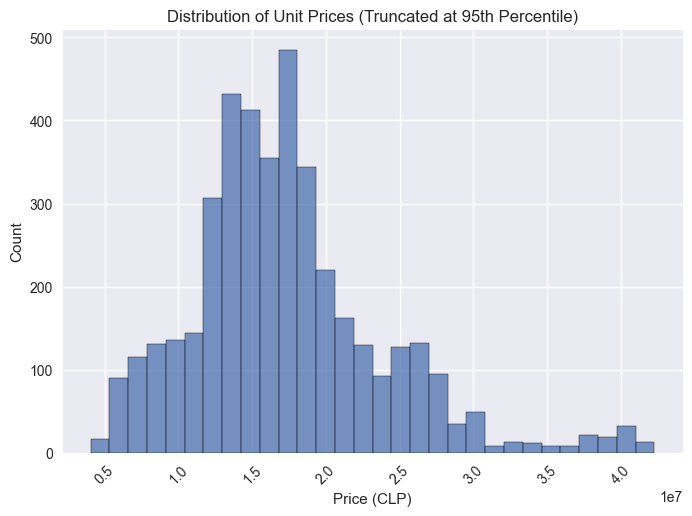

In [8]:
# Basic descriptive statistics for prices
price_stats = df['Precio Unitario'].describe()
print("\nPrice Statistics (CLP):")
print(price_stats)

#plt.figure(figsize=(20, 15))
price_95th_percentile = df['Precio Unitario'].quantile(0.97)
sns.histplot(data=df[df['Precio Unitario'] <= price_95th_percentile], x='Precio Unitario', bins=30)
plt.title('Distribution of Unit Prices (Truncated at 95th Percentile)')
plt.xlabel('Price (CLP)')
plt.xticks(rotation=45)
plt.savefig(os.path.join(output_path, 'price_distribution_truncated.png'))
plt.show()


### Others

In [9]:
list = ['Metropolitana', 'Valparaíso', 'Maule']

list = ['Metropolitana']
share_of_total_obs = df[df['Región Unidad de Compra'].isin(list)].shape[0] / df.shape[0]
print(f"Share of total observations where 'Region' is in the list: {share_of_total_obs:.2%}")

Share of total observations where 'Region' is in the list: 30.97%


In [10]:
print("\nAverage Price by Vehicle Type:")
print(df.groupby('Tipo de Producto')['Precio Unitario'].mean().sort_values(ascending=False))

print("\nAverage Price by Brand:")
print(df.groupby('Marca')['Precio Unitario'].mean().sort_values(ascending=False))


Average Price by Vehicle Type:
Tipo de Producto
AMBULANCE         4.834650e+07
POLICE VEHICLE    2.877845e+07
CARGO             2.346602e+07
MINIBUS           1.983877e+07
PICK-UP           1.776704e+07
SUV               1.566008e+07
SMALL TRUCK       1.438160e+07
FURGÓN            1.278117e+07
SEDÁN             1.021424e+07
HATCHBACK         8.429964e+06
Name: Precio Unitario, dtype: float64

Average Price by Brand:
Marca
-                4.066136e+07
MERCEDES BENZ    2.303959e+07
JEEP             2.235609e+07
DODGE            2.163025e+07
TOYOTA           2.005232e+07
FORD             1.988972e+07
SUBARU           1.886765e+07
SSANGYONG        1.814464e+07
NISSAN           1.781269e+07
MITSUBISHI       1.757080e+07
MAXUS            1.751026e+07
KIA              1.731020e+07
HONDA            1.705801e+07
OPEL             1.668802e+07
DFSK             1.668501e+07
HYUNDAI          1.655777e+07
PEUGEOT          1.643254e+07
JMC              1.554292e+07
HAVAL            1.540877e+07
CH

In [11]:
# Calculate the number of unique values in the column 'Rut Unidad de Compra'
unique_rut_count = df['Rut Unidad de Compra'].nunique()

# Print the result
print(f"The column 'Rut Unidad de Compra' has {unique_rut_count} unique values.")

The column 'Rut Unidad de Compra' has 789 unique values.


In [12]:
list = ['PICK-UP', 'SUV', 'SEDAN',  'MINIBUS']
share_of_total_obs = df[df['Tipo de Producto'].isin(list)].shape[0] / df.shape[0]
print(f"Share of total observations where 'Tipo de Producto' is in the list: {share_of_total_obs:.2%}")

Share of total observations where 'Tipo de Producto' is in the list: 81.20%


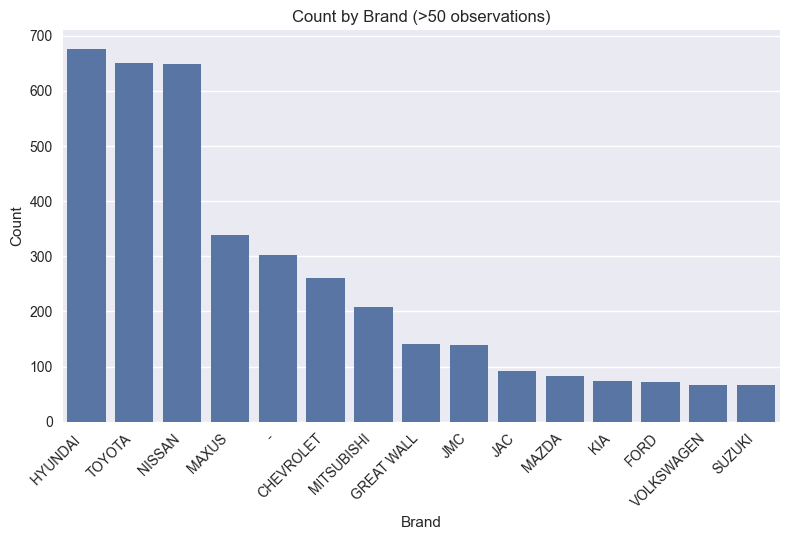

In [13]:
# Set threshold for minimum number of observations
N = 50  # Change this to your desired threshold

# Get value counts and filter for brands with more than N observations
brand_counts = df['Marca'].value_counts()
frequent_brands = brand_counts[brand_counts > N]

# Create plot with filtered data
#plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['Marca'].isin(frequent_brands.index)], 
              x='Marca', 
              order=frequent_brands.index)  # Use only the filtered brands for ordering
plt.title(f'Count by Brand (>{N} observations)')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout();
plt.savefig(os.path.join(output_path, 'count_by_brand.png'))


In [14]:
# Print additional statistics
print("\nRegional Distribution:")
print(df['Región Unidad de Compra'].value_counts())

print("\nQuantity Statistics:")
print(df['Cantidad'].describe())



Regional Distribution:
Región Unidad de Compra
Metropolitana                1326
Valparaíso                    486
Maule                         372
Bío-Bío                       330
Araucanía                     320
Lib. Gral. Bdo. O'Higgins     307
Los Lagos                     234
Coquimbo                      174
Ñuble                         133
Los Ríos                      103
Atacama                       102
Tarapacá                       87
Arica y Parinacota             87
Antofagasta                    66
íuble                         66
Magallanes y Antártica         47
Aysén                          42
Name: count, dtype: int64

Quantity Statistics:
count    4282.000000
mean        1.924334
std         7.174885
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max       410.000000
Name: Cantidad, dtype: float64


In [15]:
list = ['Metropolitana', 'Valparaíso', 'Maule']

list = ['Metropolitana']
share_of_total_obs = df[df['Región Unidad de Compra'].isin(list)].shape[0] / df.shape[0]
print(f"Share of total observations where 'Region' is in the list: {share_of_total_obs:.2%}")

Share of total observations where 'Region' is in the list: 30.97%


### by product category

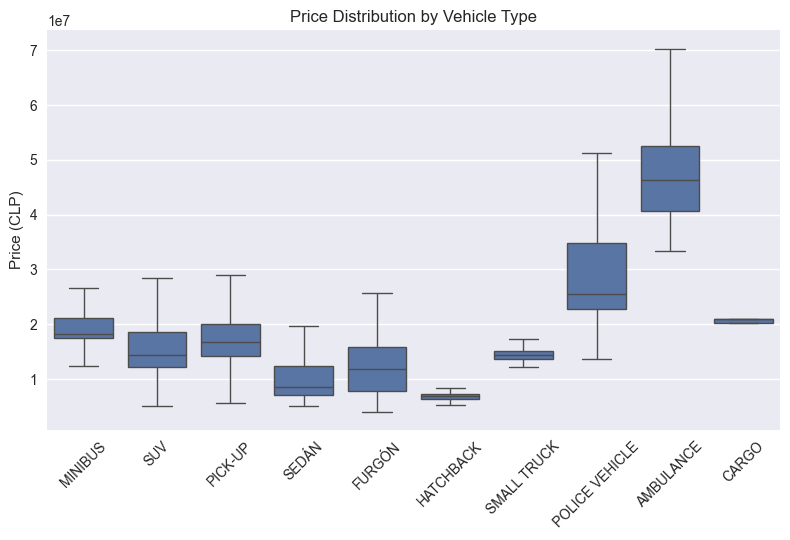

In [16]:
sns.boxplot(data=df, x='Tipo de Producto', y='Precio Unitario', showfliers=False)
plt.title('Price Distribution by Vehicle Type')
plt.xticks(rotation=45)
plt.ylabel('Price (CLP)')
plt.xlabel('')
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'price_distribution_by_vehicle.png'))
plt.show()

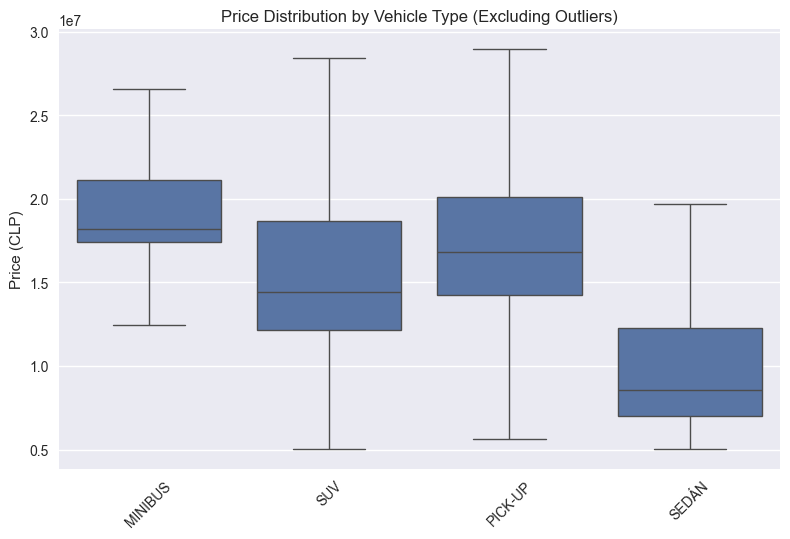

In [17]:
N = 210  # Minimum number of observations required for a product
filtered_df = df.groupby('Tipo de Producto').filter(lambda x: len(x) >= N)

#alternatively filter by list 
#vehicle_list = ['SUV', 'CAMIONETA']
#filtered_df = df[df['Tipo de Producto'].isin(vehicle_list)]

# Exclude outliers: Use the `showfliers` parameter in seaborn's boxplot
sns.boxplot(data=filtered_df, x='Tipo de Producto', y='Precio Unitario', showfliers=False)

# Customize the plot
plt.title('Price Distribution by Vehicle Type (Excluding Outliers)')
plt.xticks(rotation=45)
plt.ylabel('Price (CLP)')
plt.xlabel('')
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'price_distribution_by_vehicle2.png'))
plt.show()

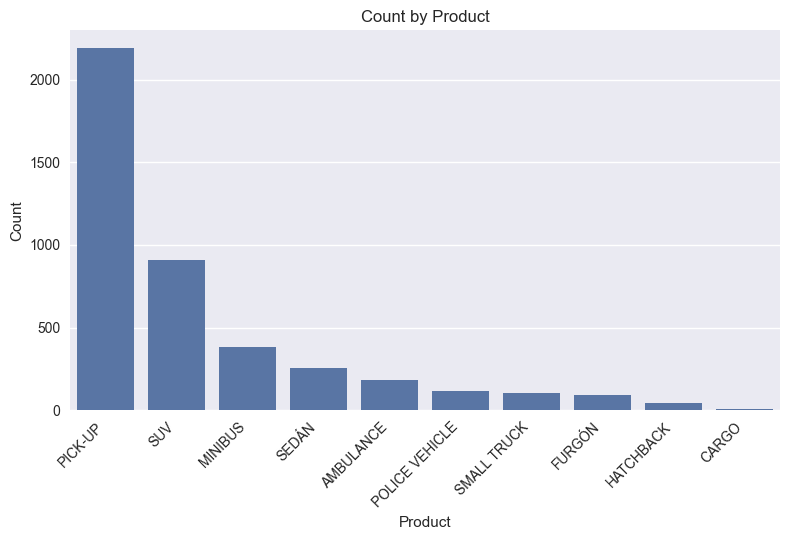

In [18]:
# 2. Vehicle types count

#plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Tipo de Producto', order=df['Tipo de Producto'].value_counts().index)
plt.title('Count by Product')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout();
plt.savefig(os.path.join(output_path, 'count_by_product.png'))



### by region

                           Rut Unidad de Compra  IDProductoCM   
Región Unidad de Compra                                         
Metropolitana                               216          1326  \
Valparaíso                                   99           486   
Maule                                        56           372   
Bío-Bío                                      88           330   
Araucanía                                    62           320   
Lib. Gral. Bdo. O'Higgins                    54           307   
Los Lagos                                    69           234   
Coquimbo                                     39           174   
Ñuble                                        38           133   
Los Ríos                                     28           103   
Atacama                                      28           102   
Tarapacá                                     26            87   
Arica y Parinacota                           27            87   
Antofagasta              

C:\Users\lucas\AppData\Local\Temp\ipykernel_49256\665669423.py:22: UserWarning: Glyph 145 (\x91) missing from current font.
  plt.tight_layout()
C:\Users\lucas\AppData\Local\Temp\ipykernel_49256\665669423.py:23: UserWarning: Glyph 145 (\x91) missing from current font.
  plt.savefig(os.path.join(output_path, 'quantity_per_buyer.png'))
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


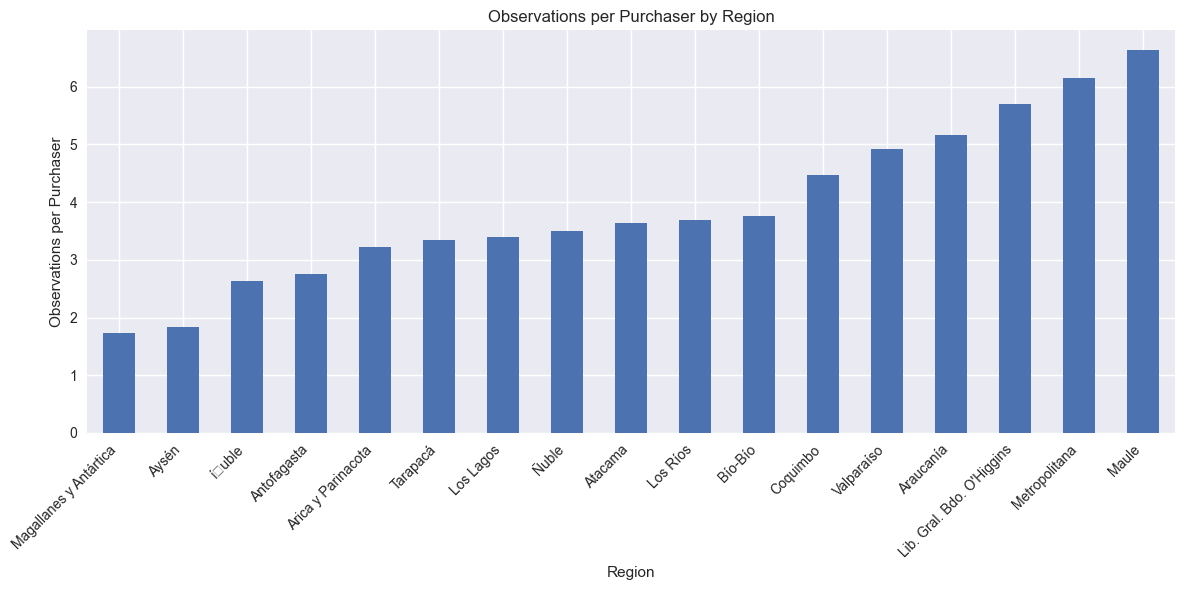

In [20]:
region_analysis = (
    df.groupby('Región Unidad de Compra')
    .agg({
        'Rut Unidad de Compra': 'nunique',
        'IDProductoCM': 'count'
    })
    .sort_values('IDProductoCM', ascending=False)
)

region_analysis['observations_per_purchaser'] = (
    region_analysis['IDProductoCM'] / 
    region_analysis['Rut Unidad de Compra']
).round(2)

print(region_analysis)
plt.figure(figsize=(12, 6))
region_analysis['observations_per_purchaser'].sort_values(ascending=True).plot(kind='bar')
plt.title('Observations per Purchaser by Region')
plt.xlabel('Region')
plt.ylabel('Observations per Purchaser')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'quantity_per_buyer.png'))

plt.show()

C:\Users\lucas\AppData\Local\Temp\ipykernel_49256\3172772154.py:11: UserWarning: Glyph 145 (\x91) missing from current font.
  plt.tight_layout()
C:\Users\lucas\AppData\Local\Temp\ipykernel_49256\3172772154.py:14: UserWarning: Glyph 145 (\x91) missing from current font.
  plt.savefig(os.path.join(output_path, 'stacked_bar_product_distribution_by_region.png'), dpi=300)
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


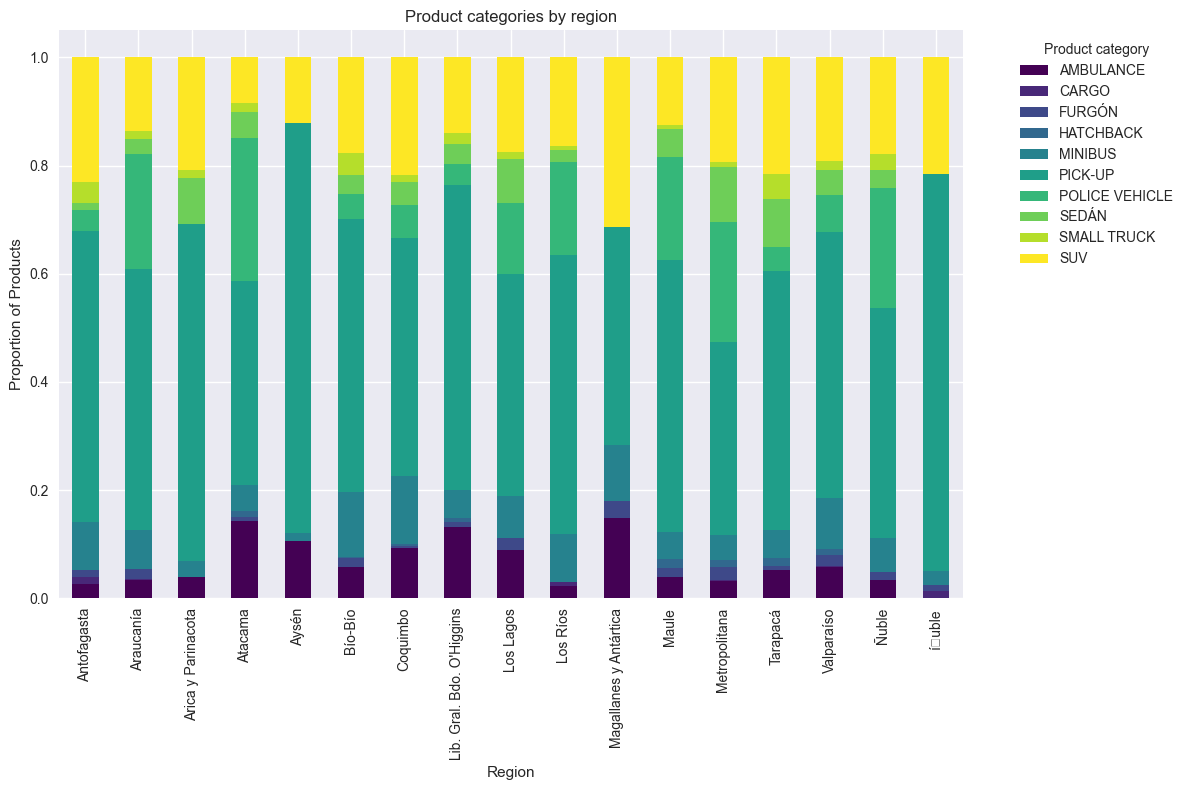

In [21]:
# Data preparation: Normalize product counts by sector
product_counts = df.groupby(['Región Unidad de Compra', 'Tipo de Producto'])['Cantidad'].sum().unstack(fill_value=0)
product_counts_normalized = product_counts.div(product_counts.sum(axis=1), axis=0)

# Plot the stacked bar chart
product_counts_normalized.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Product categories by region')
plt.xlabel('Region')
plt.ylabel('Proportion of Products')
plt.legend(title='Product category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save and show the plot
plt.savefig(os.path.join(output_path, 'stacked_bar_product_distribution_by_region.png'), dpi=300)
plt.show()


### by time

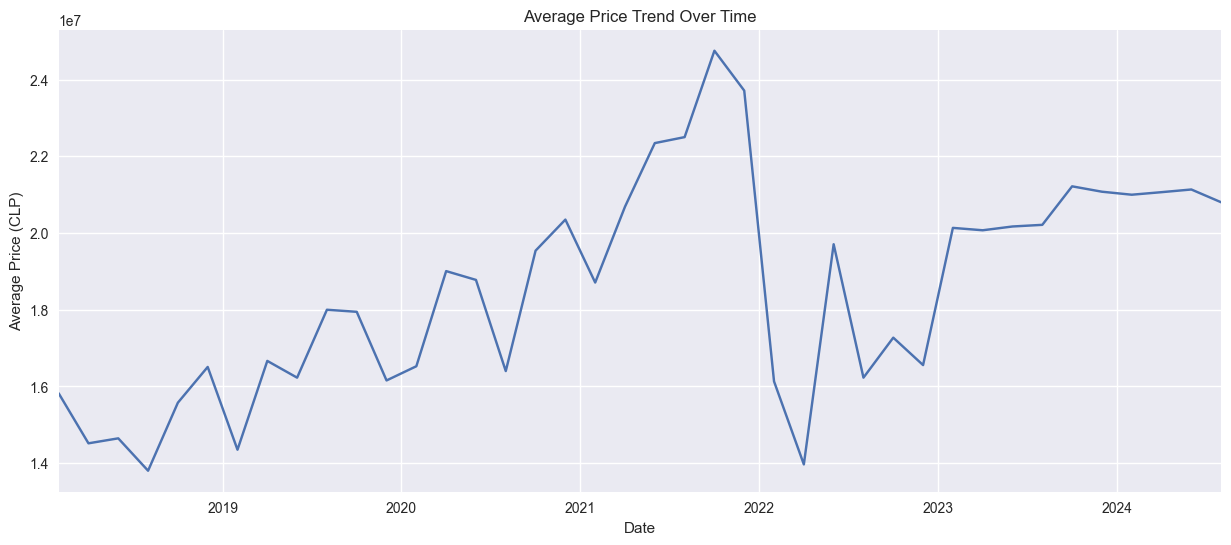

In [22]:
# Time trends analysis
df['Fecha Envio OC'] = pd.to_datetime(df['Fecha Envío OC'])

plt.figure(figsize=(15, 6))
df.set_index('Fecha Envio OC')['Precio Unitario'].resample('2M').mean().plot() # if resample is 'M' then is monthly
plt.title('Average Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price (CLP)')
plt.grid(True)
plt.savefig(os.path.join(output_path, 'price_trend.png'))
plt.show()

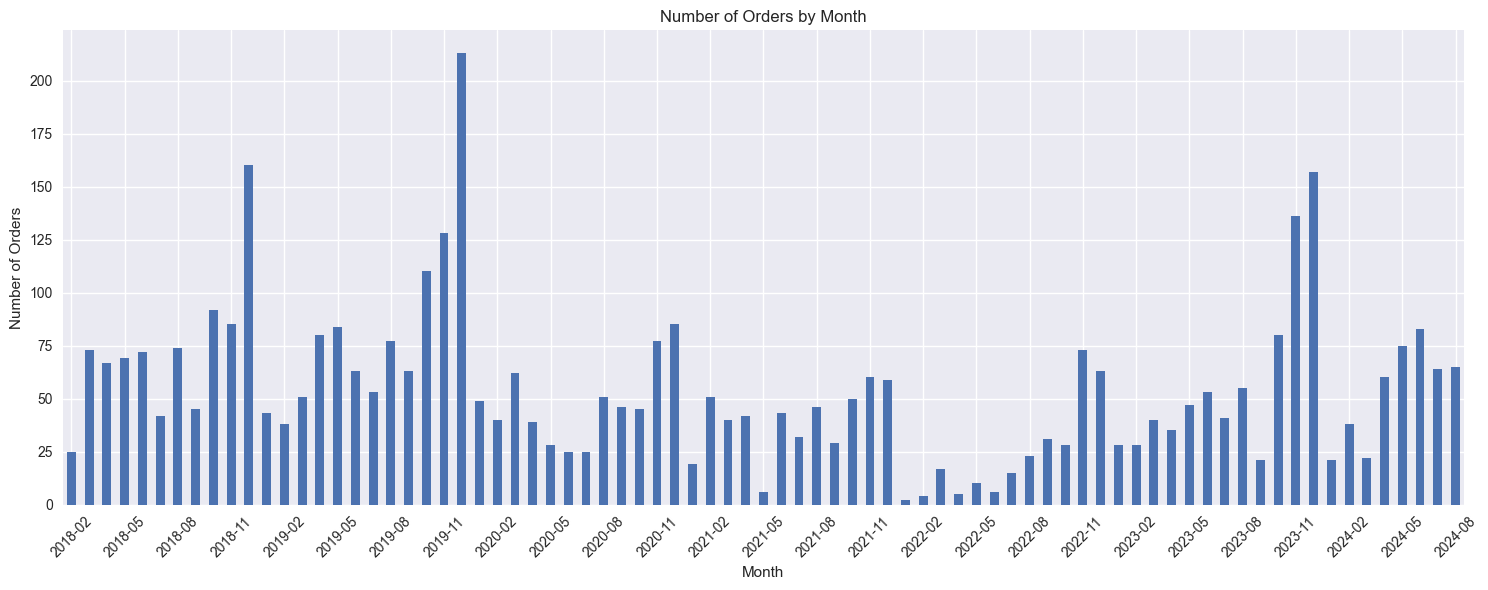

In [23]:
# Orders by month
monthly_orders = df['Fecha Envio OC'].dt.to_period('1M').value_counts().sort_index()

plt.figure(figsize=(15, 6))
monthly_orders.plot(kind='bar')

# Customize the plot
plt.title('Number of Orders by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')

# Modify x-axis ticks to show one out of every two months
xticks = range(0, len(monthly_orders), 3)  # Select every second month
plt.xticks(ticks=xticks, labels=[monthly_orders.index[i] for i in xticks], rotation=45)

plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(output_path, 'orders_by_month.png'), dpi=300)

plt.show()


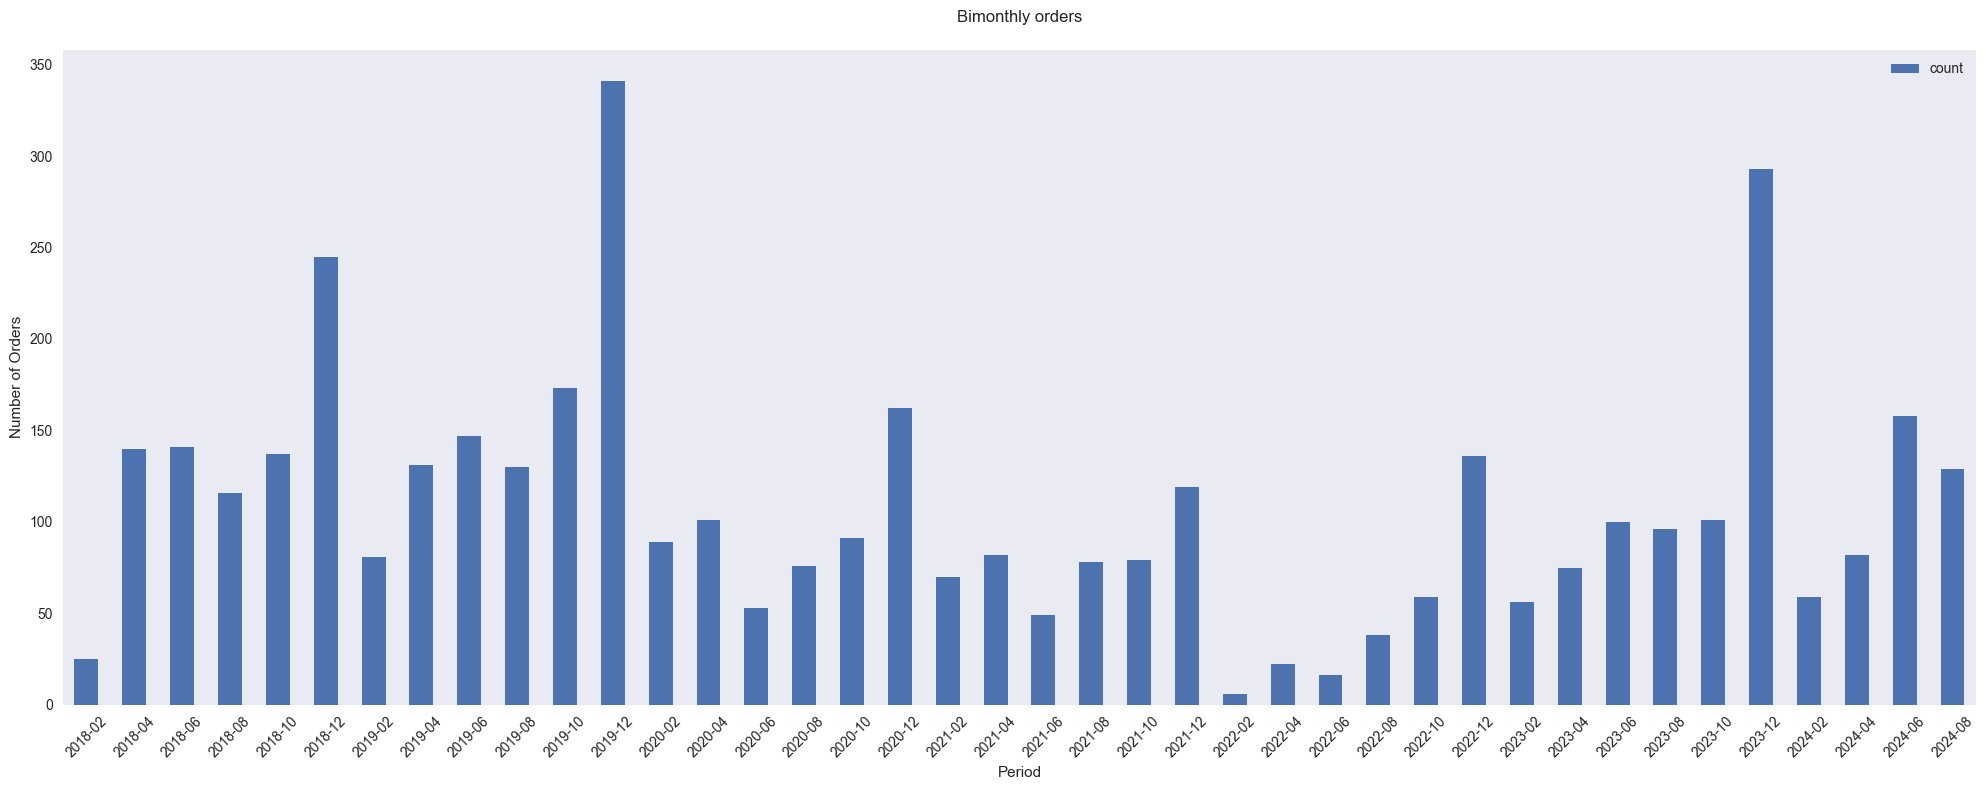

In [24]:
df_temp = pd.DataFrame({'count': 1}, index=df['Fecha Envio OC'])
bimonthly_orders = df_temp.resample('2M').count() # if resample is 'M' then is monthly

# Format the index dates to be more readable
bimonthly_orders.index = bimonthly_orders.index.strftime('%Y-%m')

# Create figure and axes explicitly
fig, ax = plt.subplots(figsize=(20, 8))

# Create the plot using the axes object
bimonthly_orders.plot(kind='bar', ax=ax)
ax.set_title('Bimonthly orders', pad=20)
ax.set_xlabel('Period')
ax.set_ylabel('Number of Orders')
ax.tick_params(axis='x', rotation=45)
ax.grid(False)
plt.savefig(os.path.join(output_path, 'bimonthly_orders.png'))

plt.tight_layout()

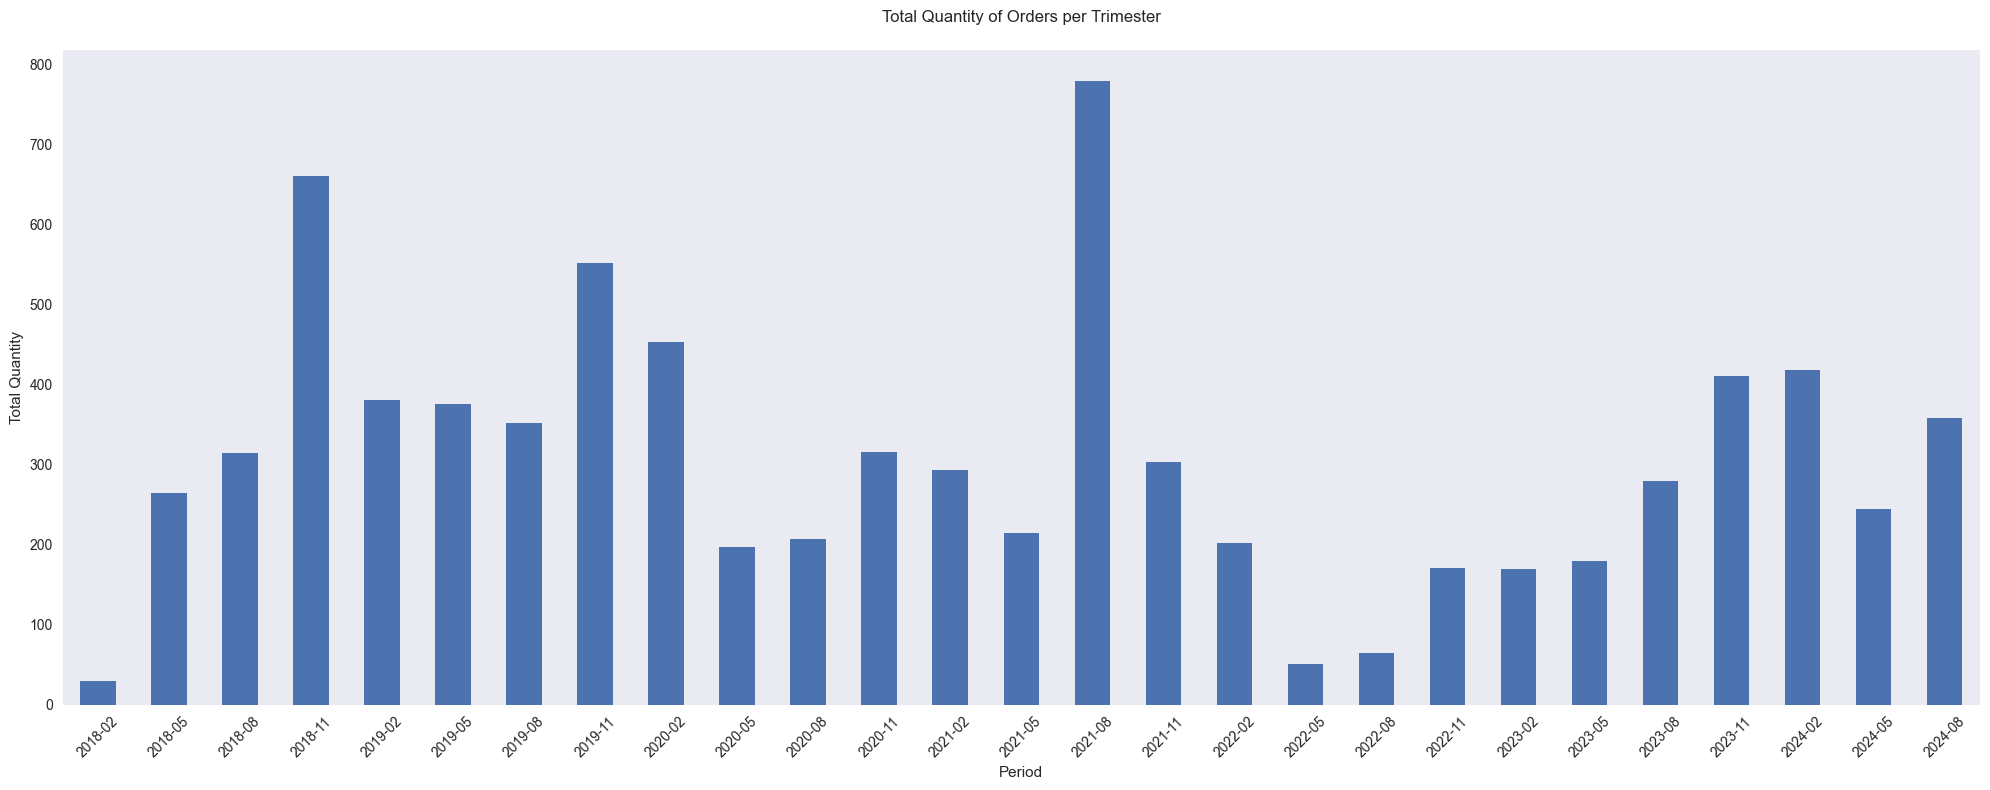

In [25]:
quantity_by_trimester = df.resample('3M', on='Fecha Envio OC')['Cantidad'].sum()

quantity_by_trimester.index = quantity_by_trimester.index.strftime('%Y-%m')

# Create figure and axes
fig, ax = plt.subplots(figsize=(20, 8))

# Create the plot
quantity_by_trimester.plot(kind='bar', ax=ax)
ax.set_title('Total Quantity of Orders per Trimester', pad=20)
ax.set_xlabel('Period')
ax.set_ylabel('Total Quantity')
ax.tick_params(axis='x', rotation=45)
ax.grid(False)
plt.savefig(os.path.join(output_path, 'trimester_orders.png'))

plt.tight_layout()

In [26]:
print(df.shape)

(4282, 18)


Number of Observations Per Year:
Year 2018: 804
Year 2019: 1003
Year 2020: 572
Year 2021: 477
Year 2022: 277
Year 2023: 721
Year 2024: 428


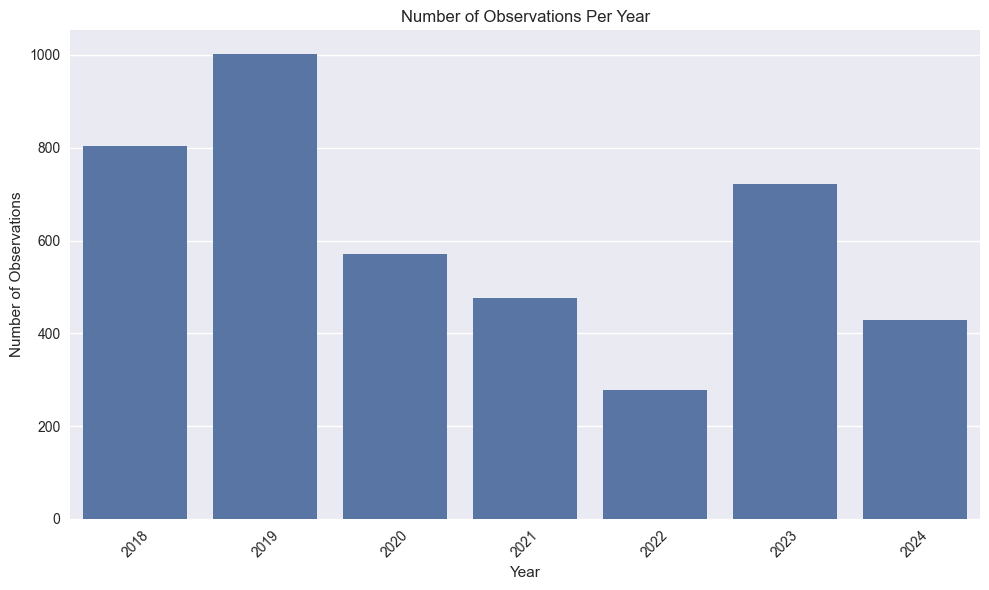

In [27]:
# Count the number of observations for each year
observations_per_year = df['year'].value_counts().sort_index()


# Print the numbers neatly
print("Number of Observations Per Year:")
for year, count in observations_per_year.items():
    print(f"Year {year}: {count}")

# Plot the data as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=observations_per_year.index, y=observations_per_year.values)
plt.title('Number of Observations Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot (optional)
output_path = "C:/Users/lucas/Dropbox/Apps/Overleaf/Second year paper/figures/cm_analisis"
plt.savefig(os.path.join(output_path, 'observations_per_year.png'), dpi=300)

# Show the plot
plt.show()


In [28]:
# Calculate the yearly average quantity of each purchase
yearly_avg_quantity = df.groupby('year')['Cantidad'].mean()

# Display the yearly averages
print("Yearly Average Quantity of Each Purchase:")
for year, avg_quantity in yearly_avg_quantity.items():
    print(f"Year {year}: {avg_quantity:.2f}")

# Calculate the yearly average quantity of each purchase
print( df['Cantidad'].mean()) 

Yearly Average Quantity of Each Purchase:
Year 2018: 1.91
Year 2019: 1.69
Year 2020: 1.87
Year 2021: 3.34
Year 2022: 1.39
Year 2023: 1.76
Year 2024: 1.63
1.9243344231667445


### Heat maps

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.draw()
C:\Users\lucas\AppData\Local\Temp\ipykernel_49256\2700691551.py:10: UserWarning: Glyph 145 (\x91) missing from current font.
  plt.savefig(os.path.join(output_path, 'heatmap_region_typevehicle.png'))
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


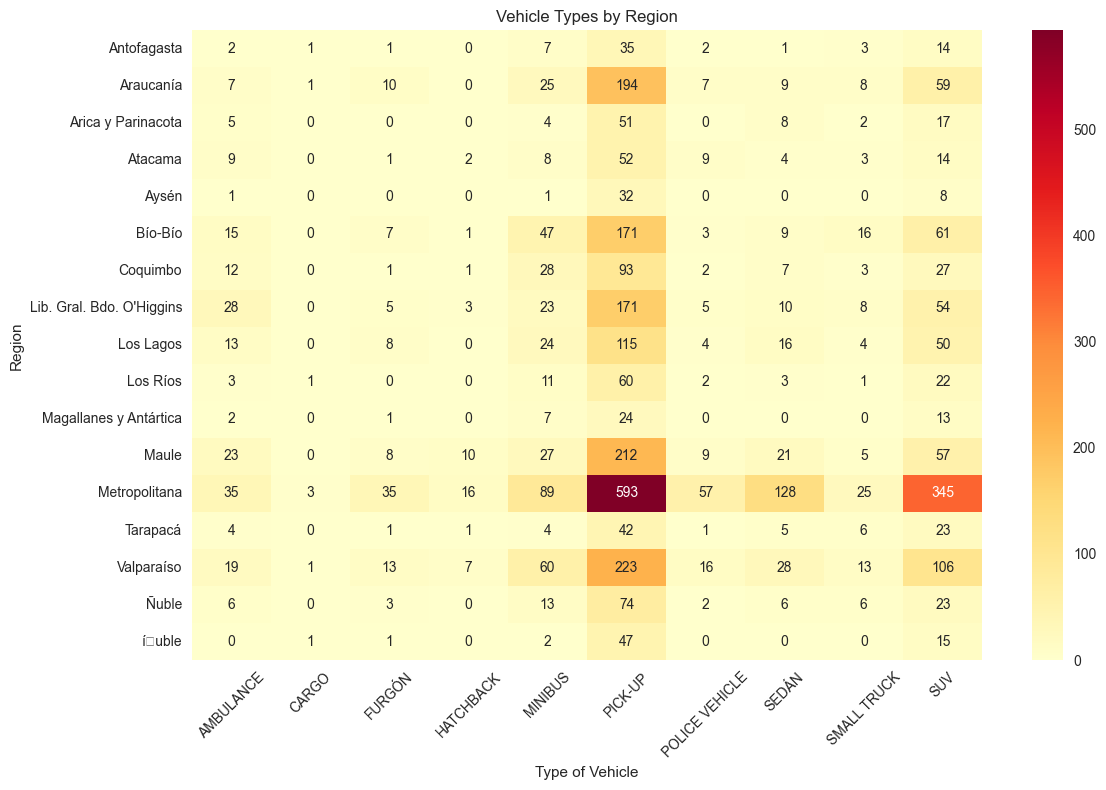

In [29]:
# Heatmap of vehicle types by region
region_vehicle_matrix = pd.crosstab(df['Región Unidad de Compra'], df['Tipo de Producto'])
plt.figure(figsize=(12, 8))
sns.heatmap(region_vehicle_matrix, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Vehicle Types by Region')
plt.xticks(rotation=45)
plt.ylabel('Region')
plt.xlabel('Type of Vehicle')
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'heatmap_region_typevehicle.png'))
plt.show()

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.draw()
C:\Users\lucas\AppData\Local\Temp\ipykernel_49256\2569863275.py:20: UserWarning: Glyph 145 (\x91) missing from current font.
  plt.savefig(os.path.join(output_path, 'heatmap_region_semester.png'))
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


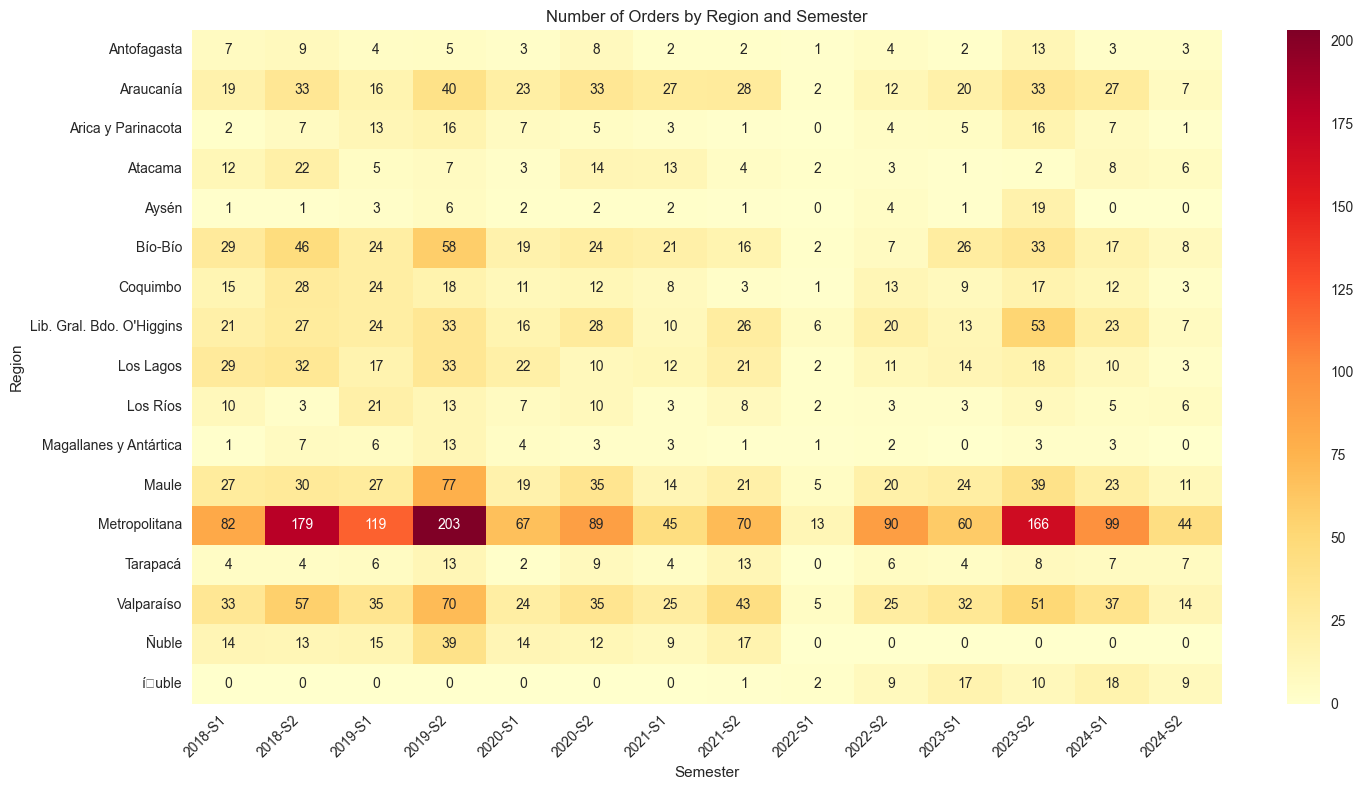

In [30]:
# Clear previous plots
plt.clf()
plt.close('all')

# Create semester column for easier grouping
# First semester will be months 1-6, second semester months 7-12
df['Semester'] = df['Fecha Envio OC'].apply(lambda x: f"{x.year}-S{1 if x.month <= 6 else 2}")

# Heatmap for number of orders by region and semester
orders_heatmap = pd.crosstab(df['Región Unidad de Compra'], df['Semester'])

# Create figure and axes
plt.figure(figsize=(15, 8))
sns.heatmap(orders_heatmap, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Number of Orders by Region and Semester')
plt.xlabel('Semester')
plt.ylabel('Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'heatmap_region_semester.png'))

plt.show()

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.draw()
C:\Users\lucas\AppData\Local\Temp\ipykernel_49256\3010125063.py:20: UserWarning: Glyph 145 (\x91) missing from current font.
  plt.savefig(os.path.join(output_path, 'heatmap_region_trimester.png'))
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


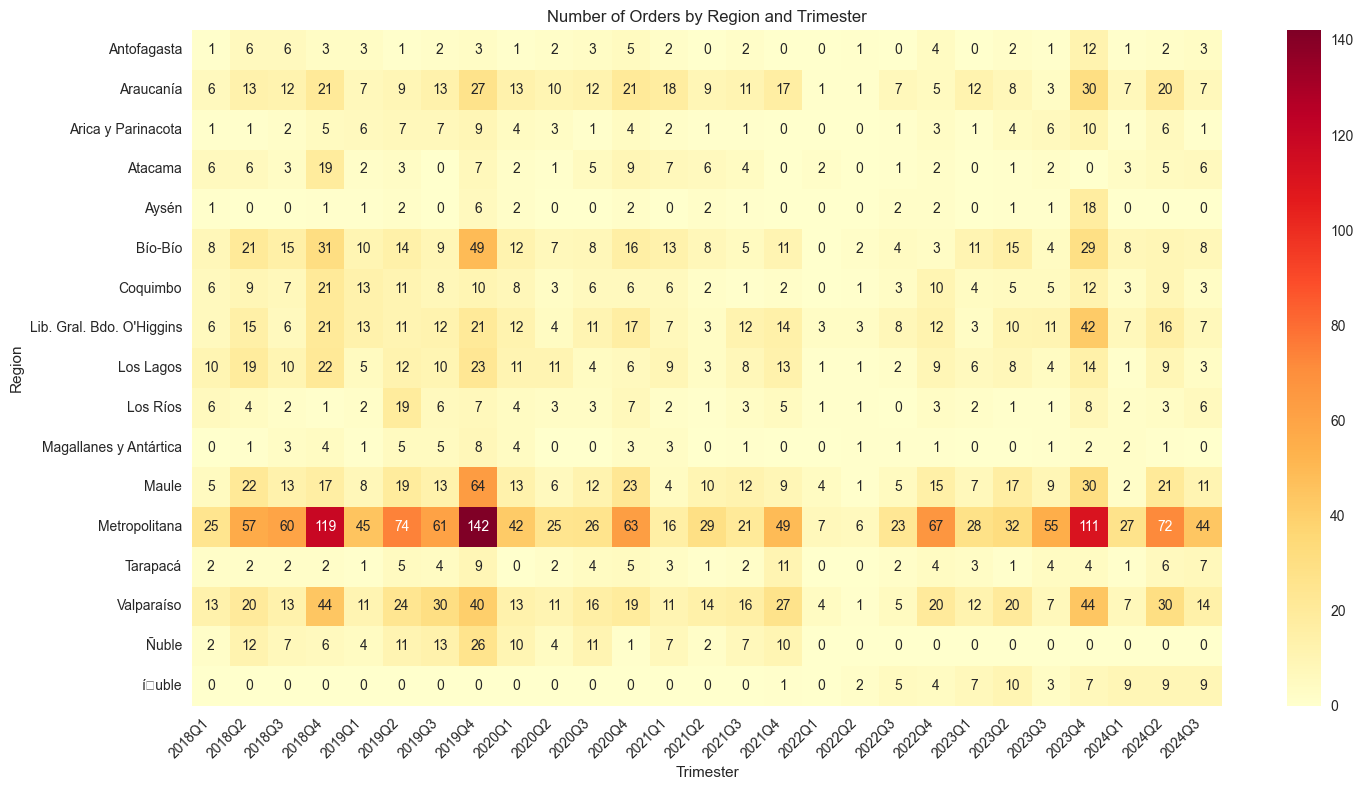

In [31]:
# For Trimester (3-month periods)
# Clear previous plots
plt.clf()
plt.close('all')

# Create trimester column (Q1, Q2, Q3, Q4)
df['Trimester'] = df['Fecha Envio OC'].dt.to_period('Q').astype(str)

# Heatmap for number of orders by region and trimester
orders_heatmap = pd.crosstab(df['Región Unidad de Compra'], df['Trimester'])

# Create figure and axes
plt.figure(figsize=(15, 8))
sns.heatmap(orders_heatmap, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Number of Orders by Region and Trimester')
plt.xlabel('Trimester')
plt.ylabel('Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'heatmap_region_trimester.png'))

plt.show()

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.draw()
C:\Users\lucas\AppData\Local\Temp\ipykernel_49256\2880679063.py:19: UserWarning: Glyph 145 (\x91) missing from current font.
  plt.savefig(os.path.join(output_path, 'heatmap_region_month.png'))
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


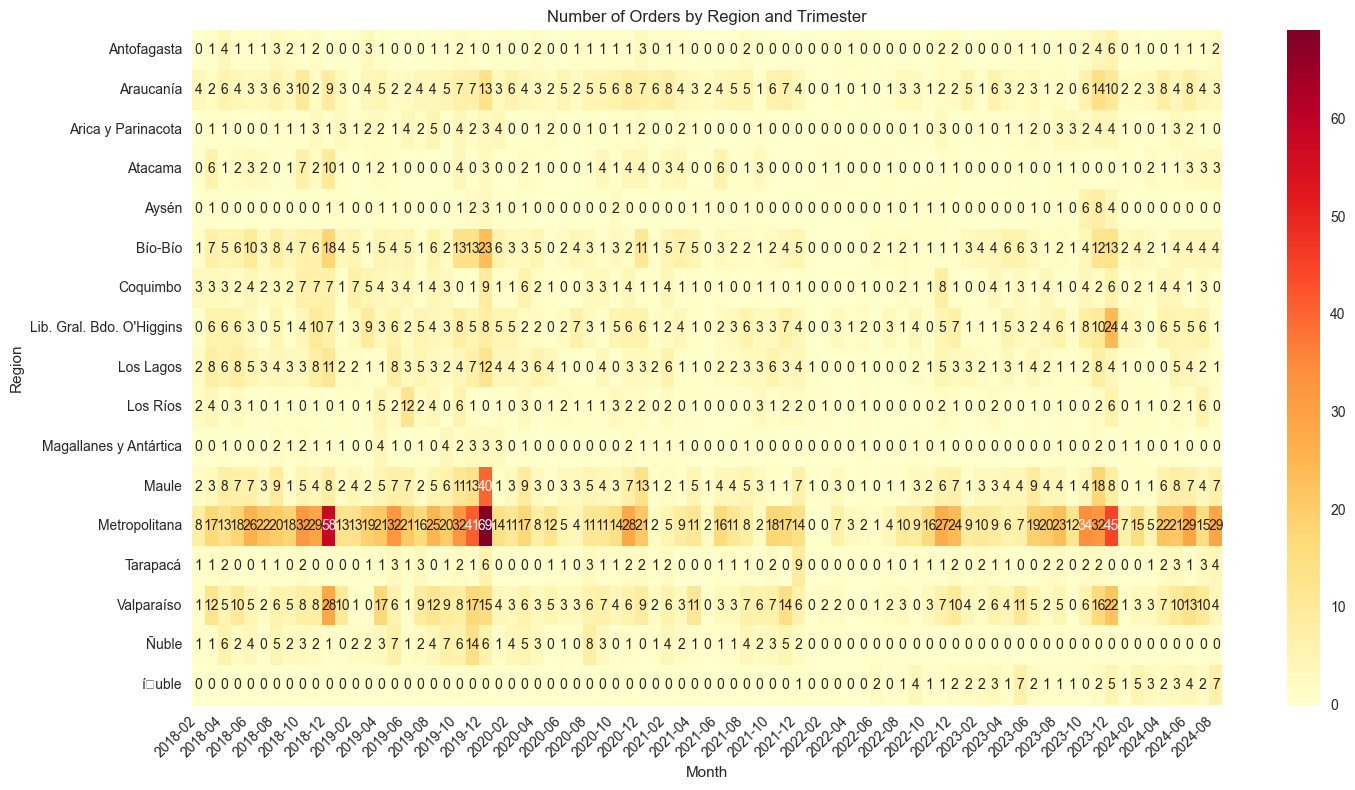

In [32]:
# Clear previous plots
plt.clf()
plt.close('all')

# Create trimester column for easier grouping
df['Trimester'] = df['Fecha Envio OC'].dt.strftime('%Y-%m')

# Heatmap for number of orders by region and trimester
orders_heatmap = pd.crosstab(df['Región Unidad de Compra'], df['Trimester'])

# Create figure and axes
plt.figure(figsize=(15, 8))
sns.heatmap(orders_heatmap, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Number of Orders by Region and Trimester')
plt.xlabel('Month')
plt.ylabel('Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'heatmap_region_month.png'))

plt.show()


C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.draw()
C:\Users\lucas\AppData\Local\Temp\ipykernel_49256\2600837307.py:21: UserWarning: Glyph 145 (\x91) missing from current font.
  plt.savefig(os.path.join(output_path, 'heatmap_quantity_by_region-month.png'))
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 145 (\x91) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


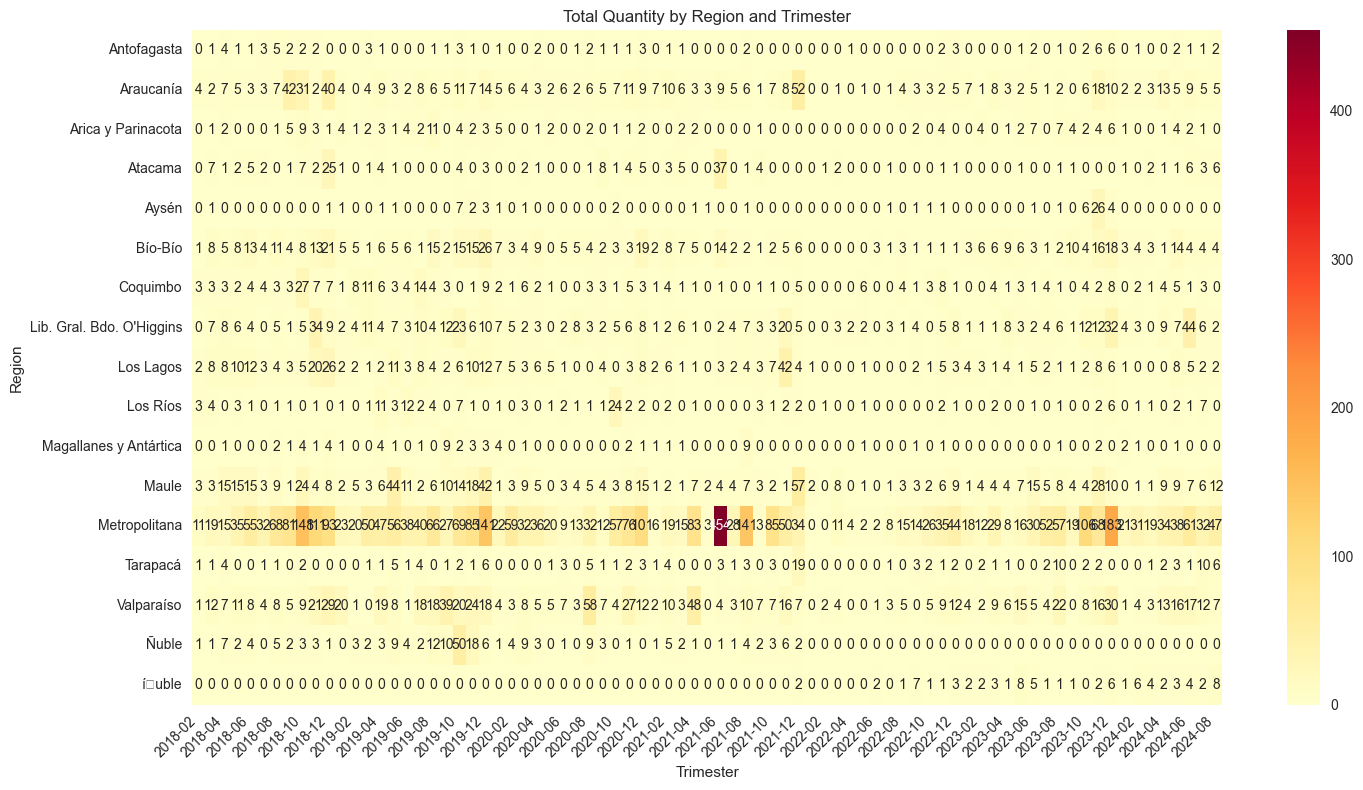

In [33]:

# Clear for next plot
plt.clf()
plt.close('all')

# Heatmap for quantities by region and trimester
quantity_heatmap = df.pivot_table(
    values='Cantidad',
    index='Región Unidad de Compra',
    columns='Trimester',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(15, 8))
sns.heatmap(quantity_heatmap, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Total Quantity by Region and Trimester')
plt.xlabel('Trimester')
plt.ylabel('Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'heatmap_quantity_by_region-month.png'))

plt.show()

### by sector 
To motivate the k-groups I have to show that different types of sectors 1. buy different cars

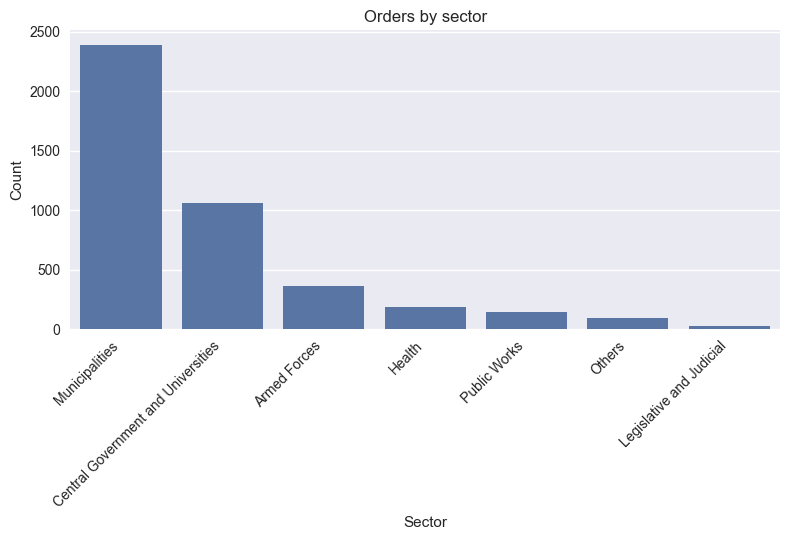

In [34]:
#plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Sector', order=df['Sector'].value_counts().index)
plt.title('Orders by sector')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout();
plt.savefig(os.path.join(output_path, 'count_by_sector.png'))



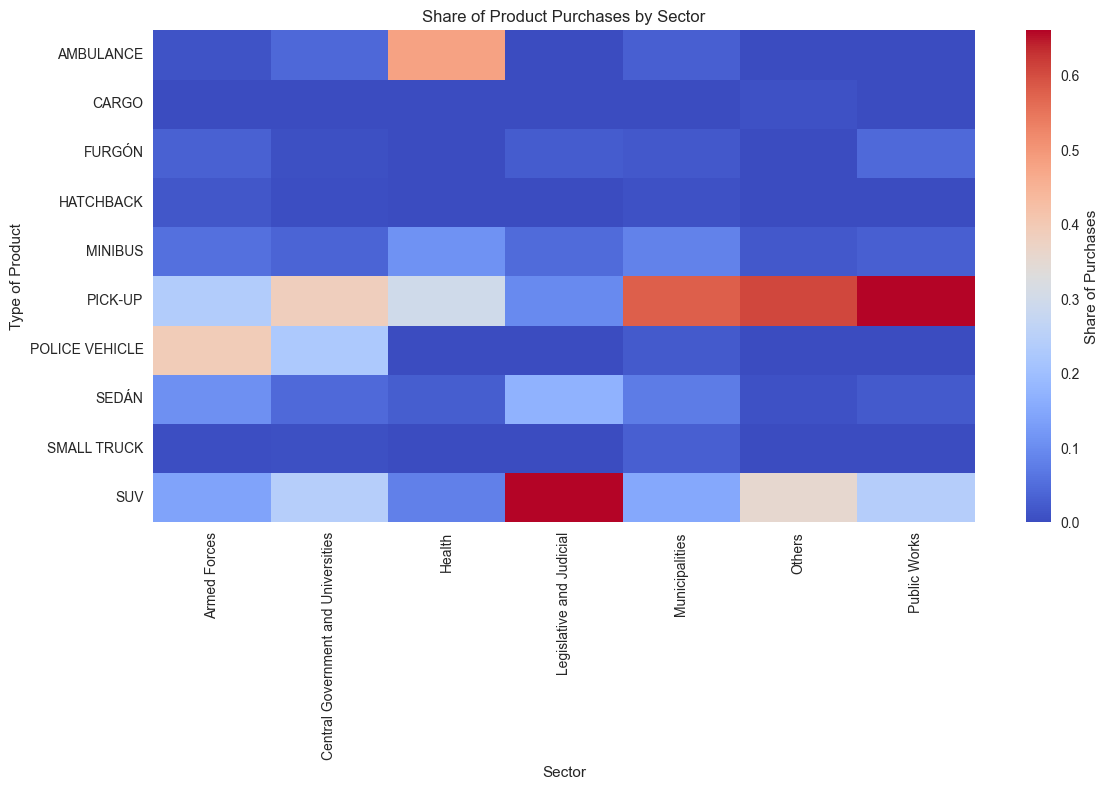

In [35]:
# Normalize the data to get shares within each sector
pivot_data = df.pivot_table(index='Tipo de Producto', columns='Sector', values='Cantidad', aggfunc='sum', fill_value=0)
pivot_data_normalized = pivot_data.div(pivot_data.sum(axis=0), axis=1)  # Normalize by column (sector total)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data_normalized, annot=False, cmap='coolwarm', cbar_kws={'label': 'Share of Purchases'})
plt.title('Share of Product Purchases by Sector')
plt.xlabel('Sector')
plt.ylabel('Type of Product')
plt.tight_layout()

# Save and show the plot
plt.savefig(os.path.join(output_path, 'heatmap_share_of_product_purchases_by_sector.png'), dpi=300)
plt.show()


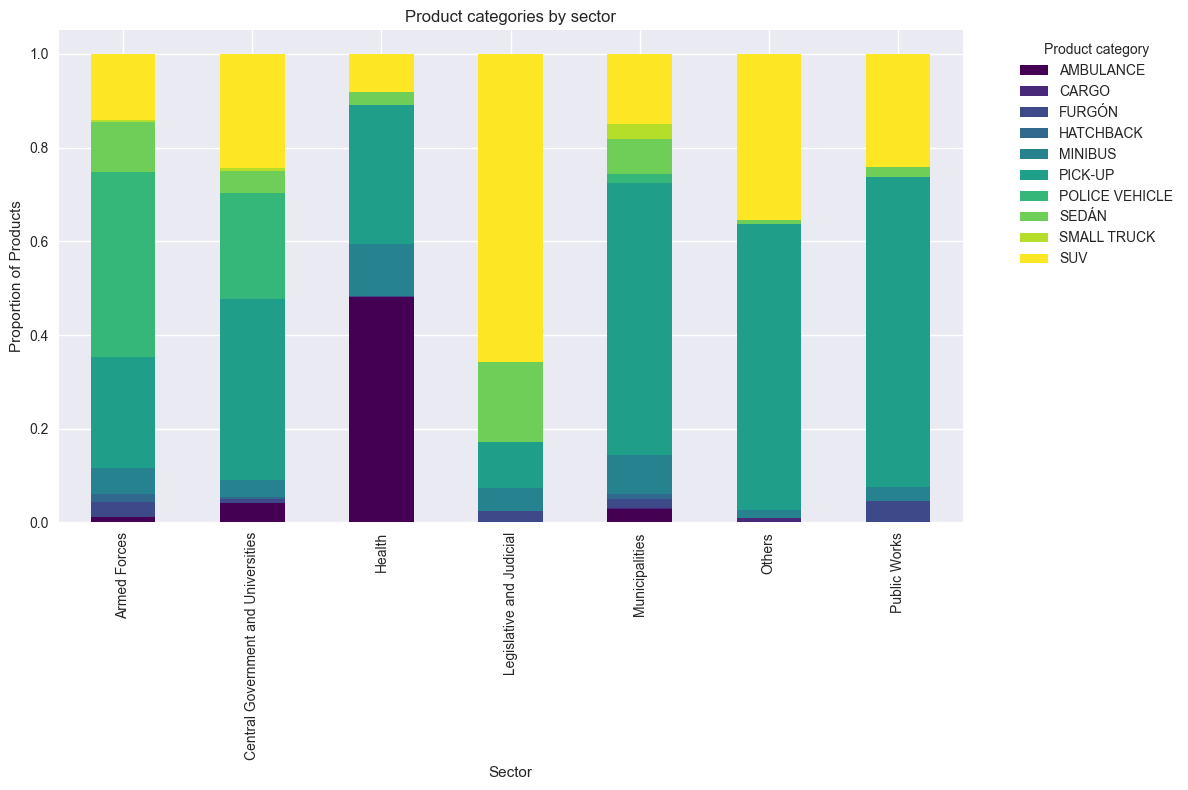

In [36]:
# Data preparation: Normalize product counts by sector
product_counts = df.groupby(['Sector', 'Tipo de Producto'])['Cantidad'].sum().unstack(fill_value=0)
product_counts_normalized = product_counts.div(product_counts.sum(axis=1), axis=0)

# Plot the stacked bar chart
product_counts_normalized.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Product categories by sector')
plt.xlabel('Sector')
plt.ylabel('Proportion of Products')
plt.legend(title='Product category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save and show the plot
plt.savefig(os.path.join(output_path, 'stacked_bar_product_distribution_by_sector.png'), dpi=300)
plt.show()


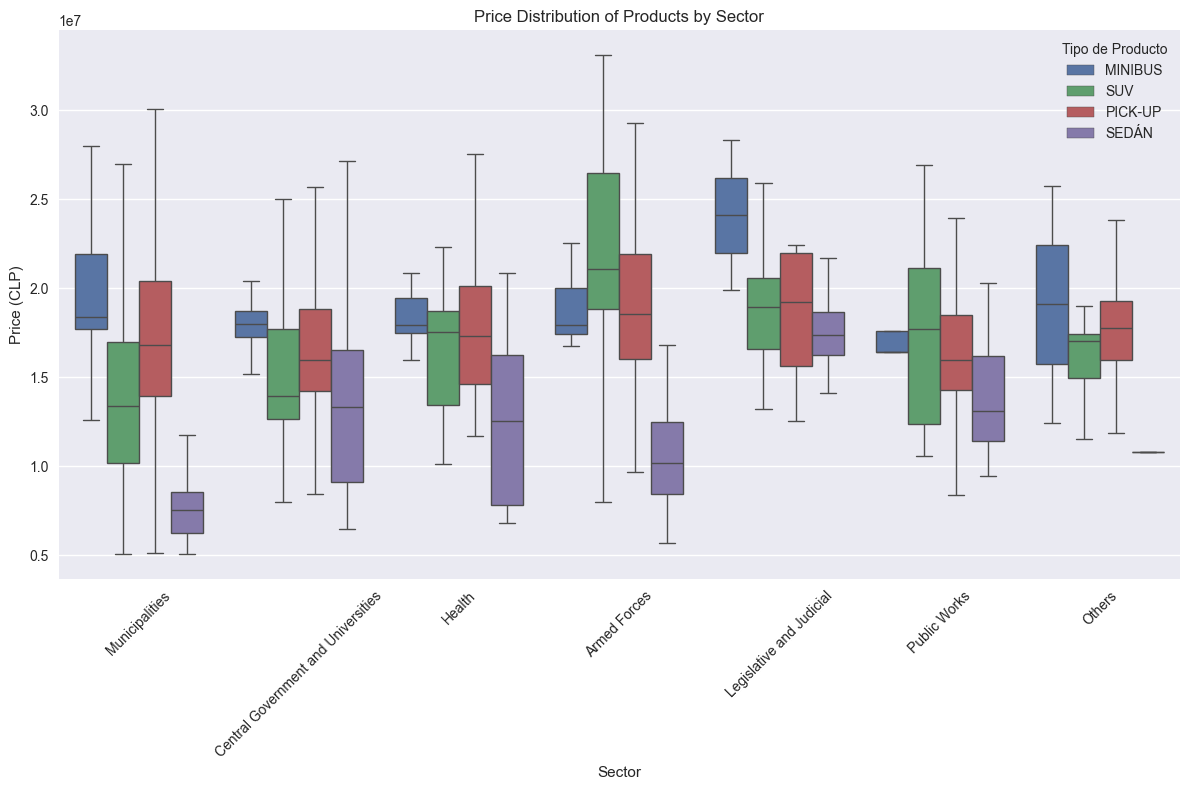

In [40]:
# Set threshold for minimum number of observations
N = 210  # Change this to your desired threshold
product_counts = df['Tipo de Producto'].value_counts()
frequent_products = product_counts[product_counts >= N].index
filtered_df = df[df['Tipo de Producto'].isin(frequent_products)]

#alternatively filter by list
#exclude_list = ['AMBULANCE', 'VEHÍCULOS POLICIALES']
#filtered_df = df[~df['Tipo de Producto'].isin(exclude_list)]


# Box plot for price distribution of products by sector
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_df, x='Sector', y='Precio Unitario', hue='Tipo de Producto', showfliers=False)
plt.title('Price Distribution of Products by Sector')
plt.xticks(rotation=45)
plt.ylabel('Price (CLP)')
plt.xlabel('Sector')
plt.tight_layout()
plt.savefig(os.path.join(output_path, 'boxplot_price_distribution_by_sector.png'), dpi=300)
plt.show()

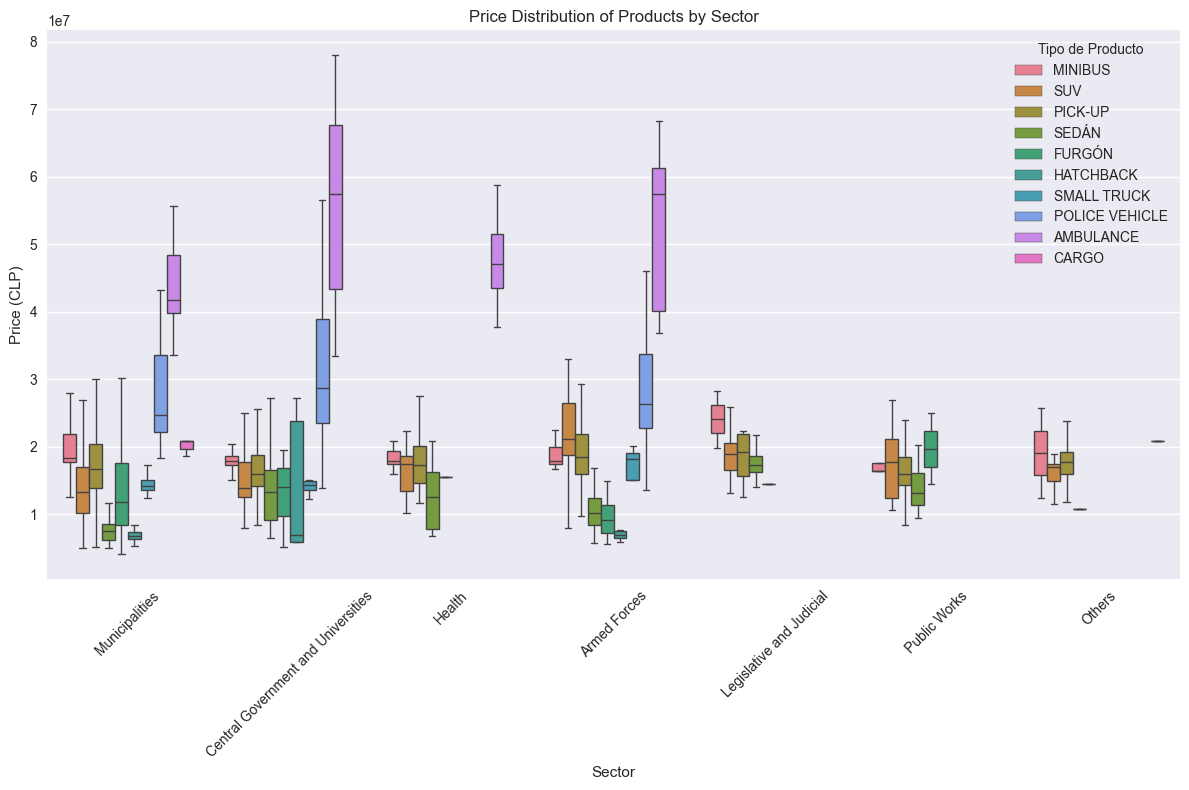

In [41]:
# Box plot for price distribution of products by sector
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Sector', y='Precio Unitario', hue='Tipo de Producto', showfliers=False)
plt.title('Price Distribution of Products by Sector')
plt.xticks(rotation=45)
plt.ylabel('Price (CLP)')
plt.xlabel('Sector')
plt.tight_layout()

# Save and show the plot
plt.savefig(os.path.join(output_path, 'boxplot_price_distribution_by_sector2.png'), dpi=300)
plt.show()


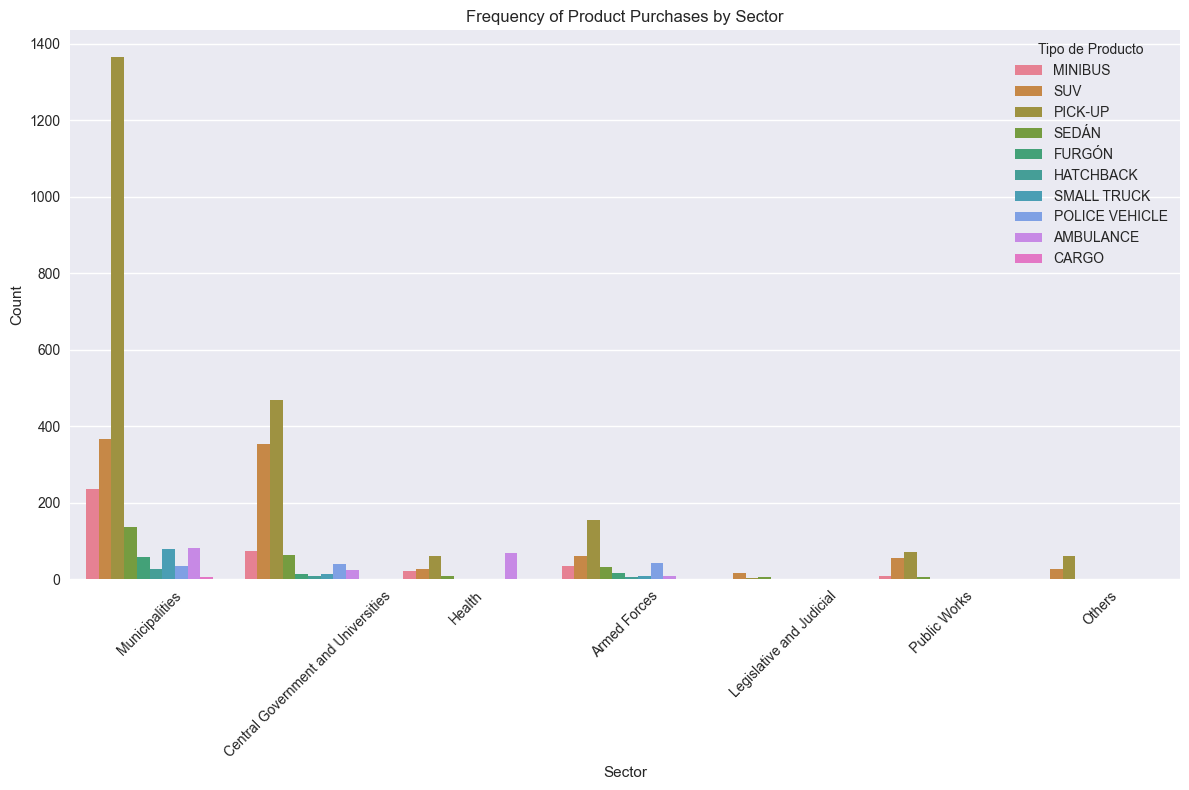

In [42]:
# Count plot for frequency of products purchased by each sector
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Sector', hue='Tipo de Producto')
plt.title('Frequency of Product Purchases by Sector')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Sector')
plt.tight_layout()

# Save and show the plot
plt.savefig(os.path.join(output_path, 'countplot_product_frequency_by_sector.png'), dpi=300)
plt.show()
